In [10]:
from model import IntersectionModel

model = IntersectionModel()
model.run_model(200)

model_data = model.datacollector.get_model_vars_dataframe()


In [11]:
# Save the model data to a csv file
model_data.to_csv('model_data.csv')

Text(0, 0.5, 'Collisions')

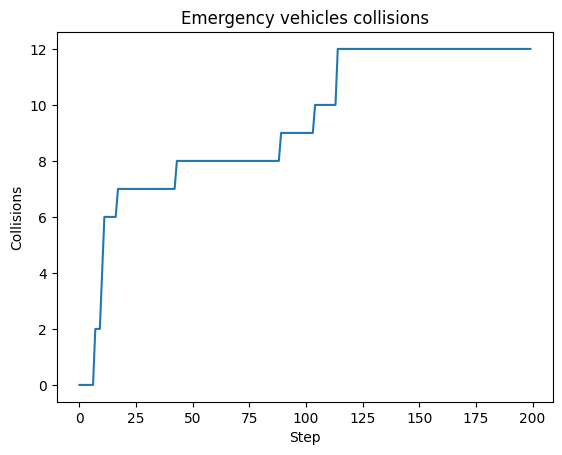

In [14]:
# Emergency vehicles collisions
collisions = model_data['Emergency_collisions']

# Plot the collisions
plot = collisions.plot(title='Emergency vehicles collisions')
plot.set_xlabel('Step')
plot.set_ylabel('Collisions')

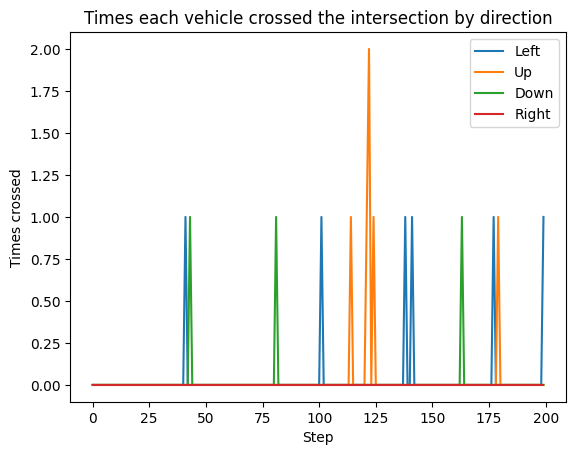

In [18]:
# Times each vehicle crossed the intersection by direction
times_crossed_left = model_data['Vehicles_crossed_left']
times_crossed_up = model_data['Vehicles_crossed_up']
times_crossed_down = model_data['Vehicles_crossed_down']
times_crossed_right = model_data['Vehicles_crossed_right']

# Plot the times each vehicle crossed the intersection by direction
plot = times_crossed_left.plot(title='Times each vehicle crossed the intersection by direction')
times_crossed_up.plot(ax=plot)
times_crossed_down.plot(ax=plot)
times_crossed_right.plot(ax=plot)
plot.set_xlabel('Step')
plot.set_ylabel('Times crossed')

# Legend
plot.legend(['Left', 'Up', 'Down', 'Right'])

# Batch runner